In [1]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Z = np.loadtxt('data/Trajectory_data.csv', delimiter=',')
trjcv = np.loadtxt('data/TrajectoryCV_data.csv', delimiter=',')
energy = np.loadtxt('data/LJ7FreeEnergy.csv', delimiter=',')

# Four Metastable States
We assign: 
* State 0: $0.6<\mu_2<0.8, \mu_3 > 0.8$ 
* State 1: $0.65<\mu_2<0.8, 0.2<\mu_3<0.5$ 
* State 2: $0.87<\mu_2<1., 0.15<\mu_3<0.4$ 
* State 3: $0.4<\mu_2<0.7, -0.2<\mu_3<0.0$

In [125]:
idx0 = np.logical_and.reduce([0.6 < trjcv[:, 0], trjcv[:, 0] < 0.8, trjcv[:, 1] > 0.8])
idx1 = np.logical_and.reduce([0.65 < trjcv[:, 0], trjcv[:, 0] < 0.8, trjcv[:, 1] > 0.2, trjcv[:, 1] < 0.5])
idx2 = np.logical_and.reduce([0.87 < trjcv[:, 0], trjcv[:, 0] < 1., trjcv[:, 1] > 0.15, trjcv[:, 1] < 0.4])
idx3 = np.logical_and.reduce([0.4 < trjcv[:, 0], trjcv[:, 0] < 0.7, trjcv[:, 1] > -0.2, trjcv[:, 1] < 0.0])
trj0 = trjcv[idx0]; Z0 = Z[idx0]
trj1 = trjcv[idx1]; Z1 = Z[idx1]
trj2 = trjcv[idx2]; Z2 = Z[idx2]
trj3 = trjcv[idx3]; Z3 = Z[idx3]

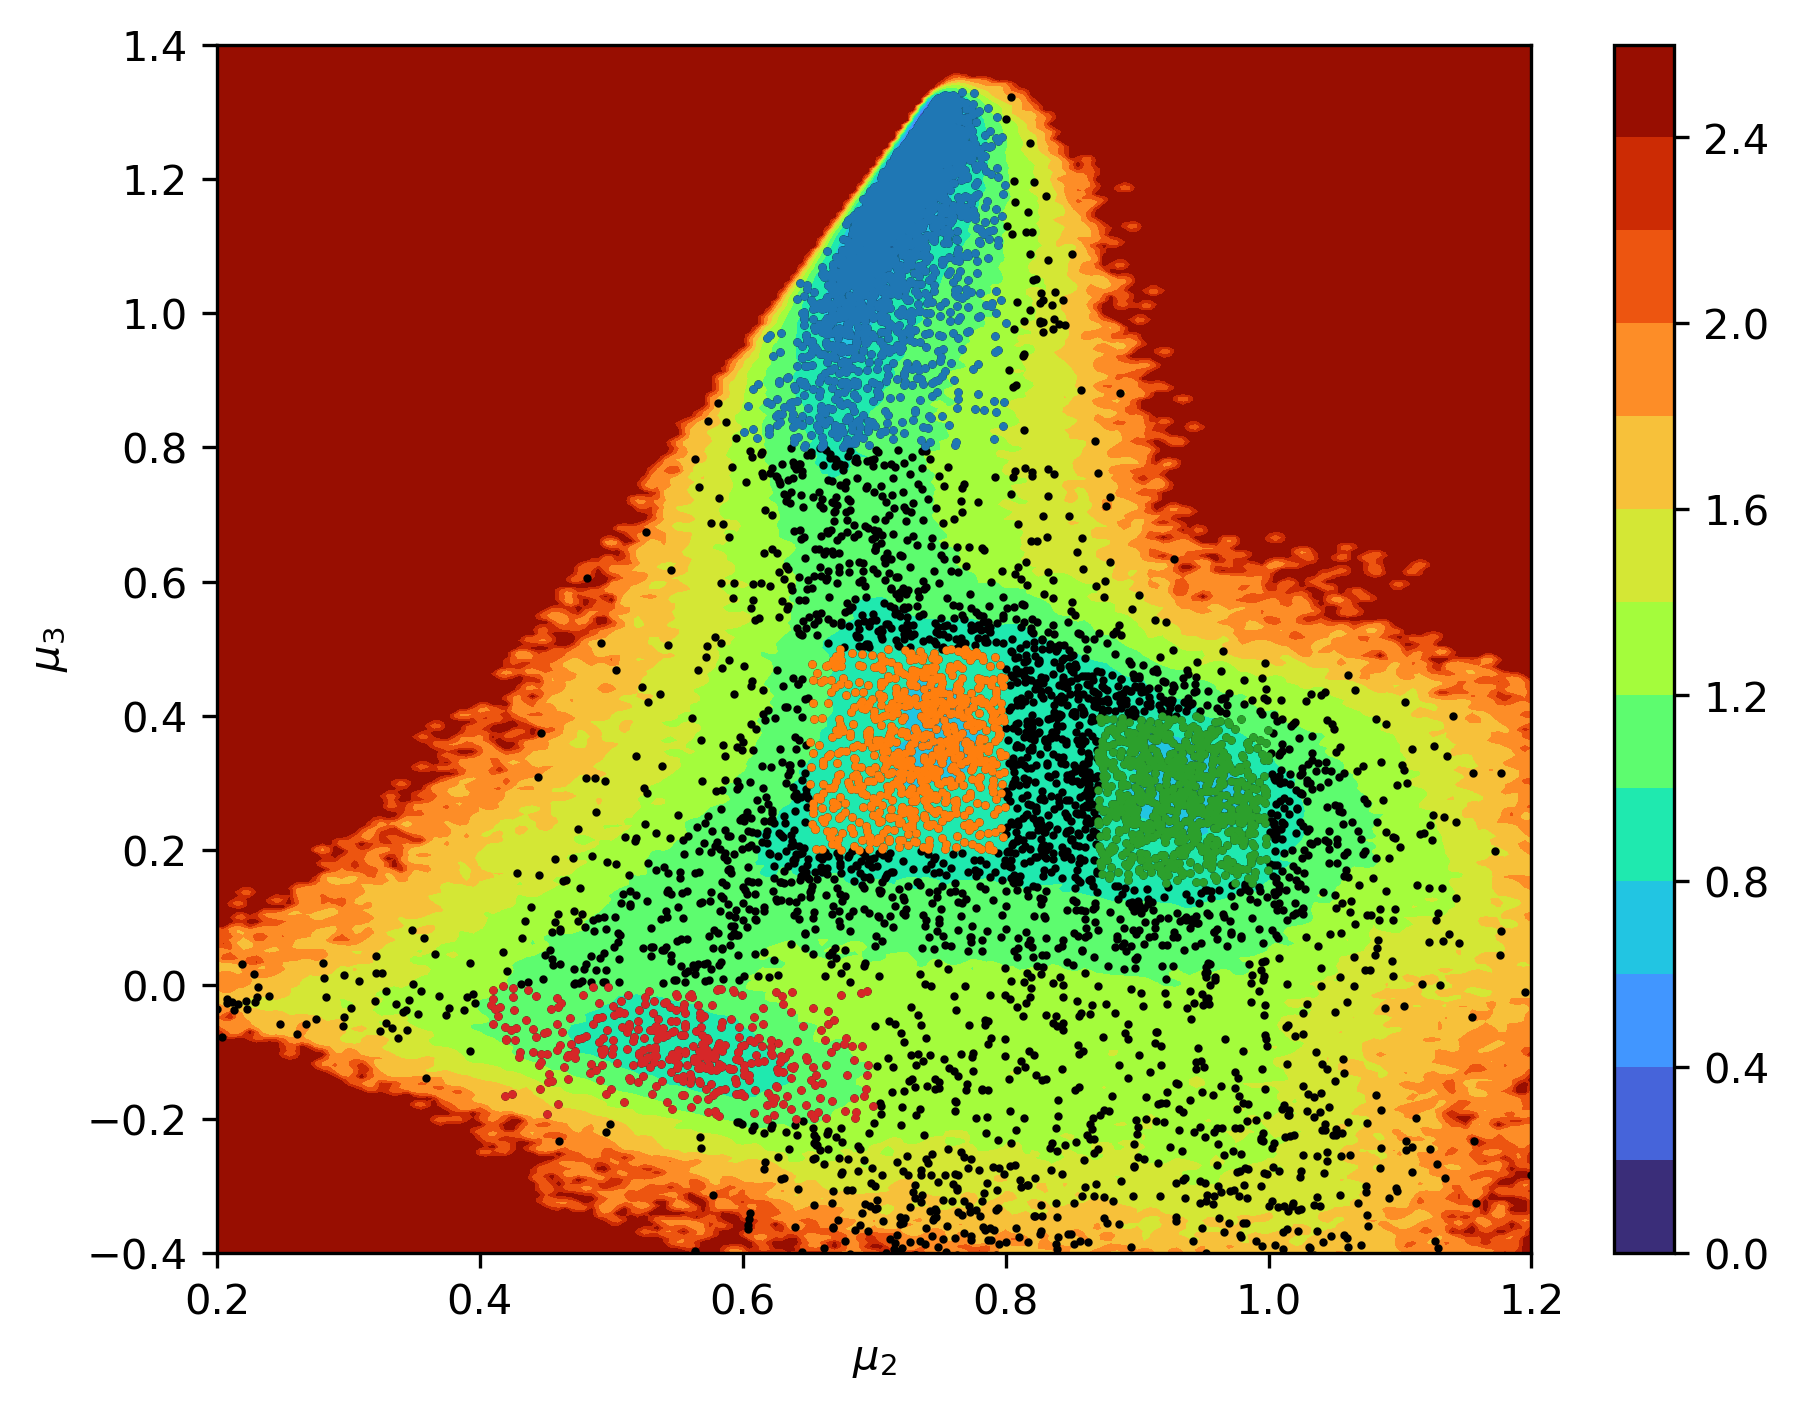

In [126]:
xx, yy = np.meshgrid(
    np.linspace(0.2, 1.2, energy.shape[1]), 
    np.linspace(-0.5, 1.7, energy.shape[0]),
    indexing='xy'
    )
plt.figure(dpi=300)
plt.contourf(xx, yy, energy, cmap='turbo', levels=15)
plt.colorbar()
plt.scatter(trjcv[:, 0], trjcv[:, 1], s=1, color='black')
plt.scatter(trj0[:, 0], trj0[:, 1], s=1)#, color='black')
plt.scatter(trj1[:, 0], trj1[:, 1], s=1)#, color='black')
plt.scatter(trj2[:, 0], trj2[:, 1], s=1)#, color='black')
plt.scatter(trj3[:, 0], trj3[:, 1], s=1)#, color='black')
# plt.colorbar(location='left')
plt.xlabel('$\mu_2$')
plt.ylabel('$\mu_3$')
plt.ylim(-0.4, 1.4)
plt.xlim(0.2, 1.2)
plt.tight_layout()
plt.show()

# MDA

In [127]:
m = Z.mean(0)
m0 = Z0.mean(0)
m1 = Z1.mean(0)
m2 = Z2.mean(0)
m3 = Z3.mean(0)

S0 = (Z0 - m0).T @ (Z0 - m0)
S1 = (Z1 - m1).T @ (Z1 - m1)
S2 = (Z2 - m2).T @ (Z2 - m2)
S3 = (Z3 - m3).T @ (Z3 - m3)
Sw = S0 + S1 + S2 + S3

In [128]:
Sb = len(Z0) * np.outer(m0 - m, m0 - m) \
    + len(Z1) * np.outer(m1 - m, m1 - m) \
    + len(Z2) * np.outer(m2 - m, m2 - m) \
    + len(Z3) * np.outer(m3 - m, m3 - m)

In [129]:
L = np.linalg.cholesky(Sw + 1e-7 * np.eye(len(Sw)))
A = np.linalg.inv(L) @ Sb @ np.linalg.inv(L.T)

In [130]:
lam, Y = np.linalg.eig(A)
ord = np.flip(np.argsort(lam))
Y_ = Y[:, ord][:, :2]
W = np.real(np.linalg.inv(L.T) @ Y_)

In [134]:
W

array([[ -6.4453636 , -26.304818  ],
       [ 12.0009778 ,  68.2728764 ],
       [ 20.09538006,  -9.79713977],
       [-31.2981342 , -68.28048667],
       [-27.96907544, -23.41881544],
       [  2.9777044 ,  33.41008606],
       [ 24.23023862,  49.86077833],
       [ 25.98091493,  30.64188105],
       [ 14.94170978,  -0.24527429],
       [  0.69929926, -23.96346541],
       [-10.34962684, -32.94100997],
       [-15.76239854, -28.20239902],
       [-15.82446303, -14.93511364],
       [-12.12311881,   0.86475214],
       [ -6.54206425,  14.20100917],
       [ -0.7193116 ,  21.72238637],
       [  4.15785418,  21.69707725],
       [  7.36719518,  13.6870671 ],
       [  8.57594697,  -1.84376341],
       [  7.73756818, -23.88510133]])

In [131]:
U = Z @ W
U = (U - np.min(U, axis=0)) / np.ptp(U, axis=0)

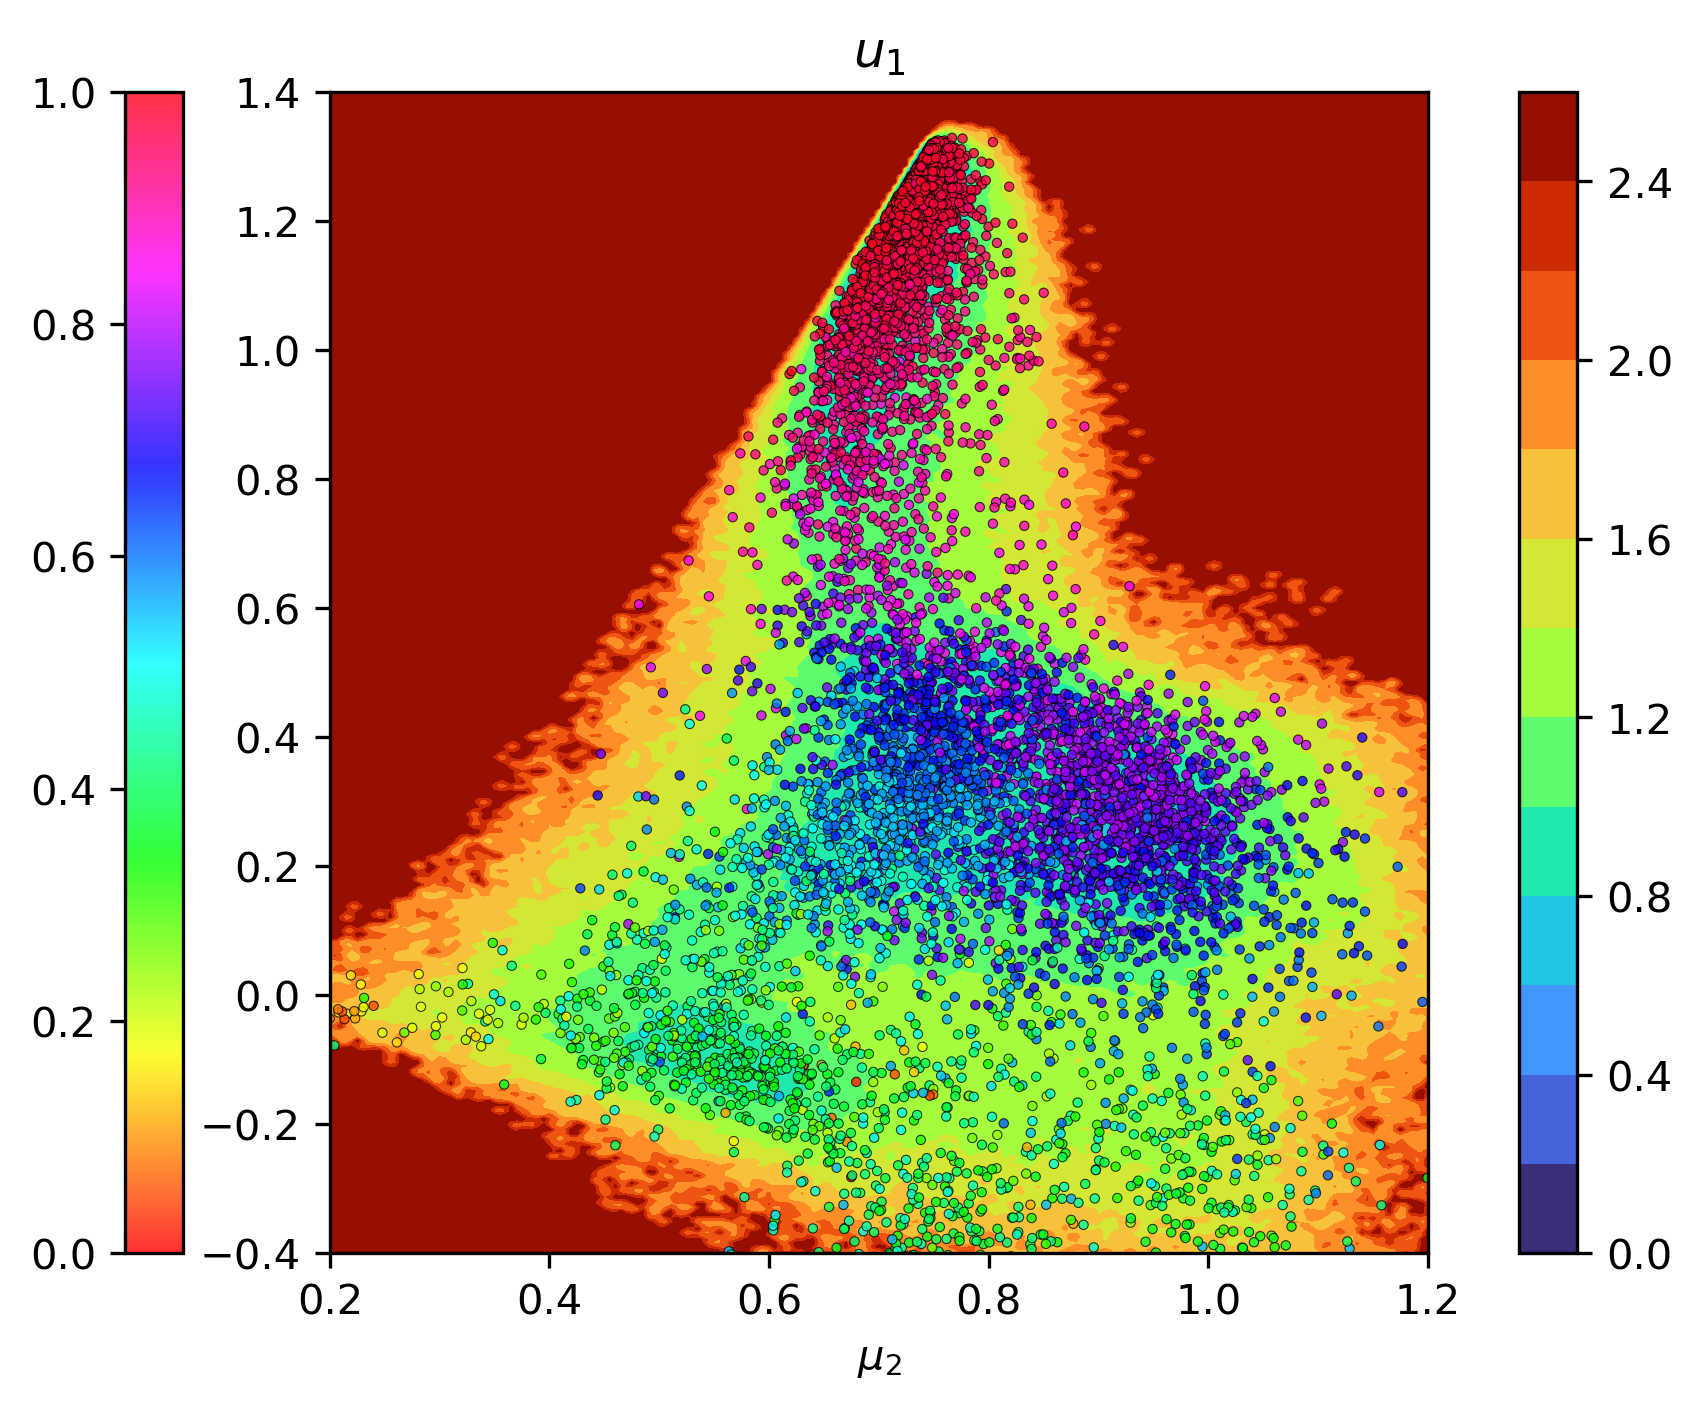

In [132]:
plt.figure(dpi=300)
plt.contourf(xx, yy, energy, cmap='turbo', levels=15)
plt.colorbar()
plt.scatter(trjcv[:, 0], trjcv[:, 1], s=5, c=U[:, 0], alpha=0.8, cmap='hsv', edgecolors='black', linewidth=0.25)
plt.colorbar(location='left')
plt.xlabel('$\mu_2$')
plt.ylabel('$\mu_3$')
plt.ylim(-0.4, 1.4)
plt.xlim(0.2, 1.2)
plt.title('$u_1$')
plt.tight_layout()
plt.show()

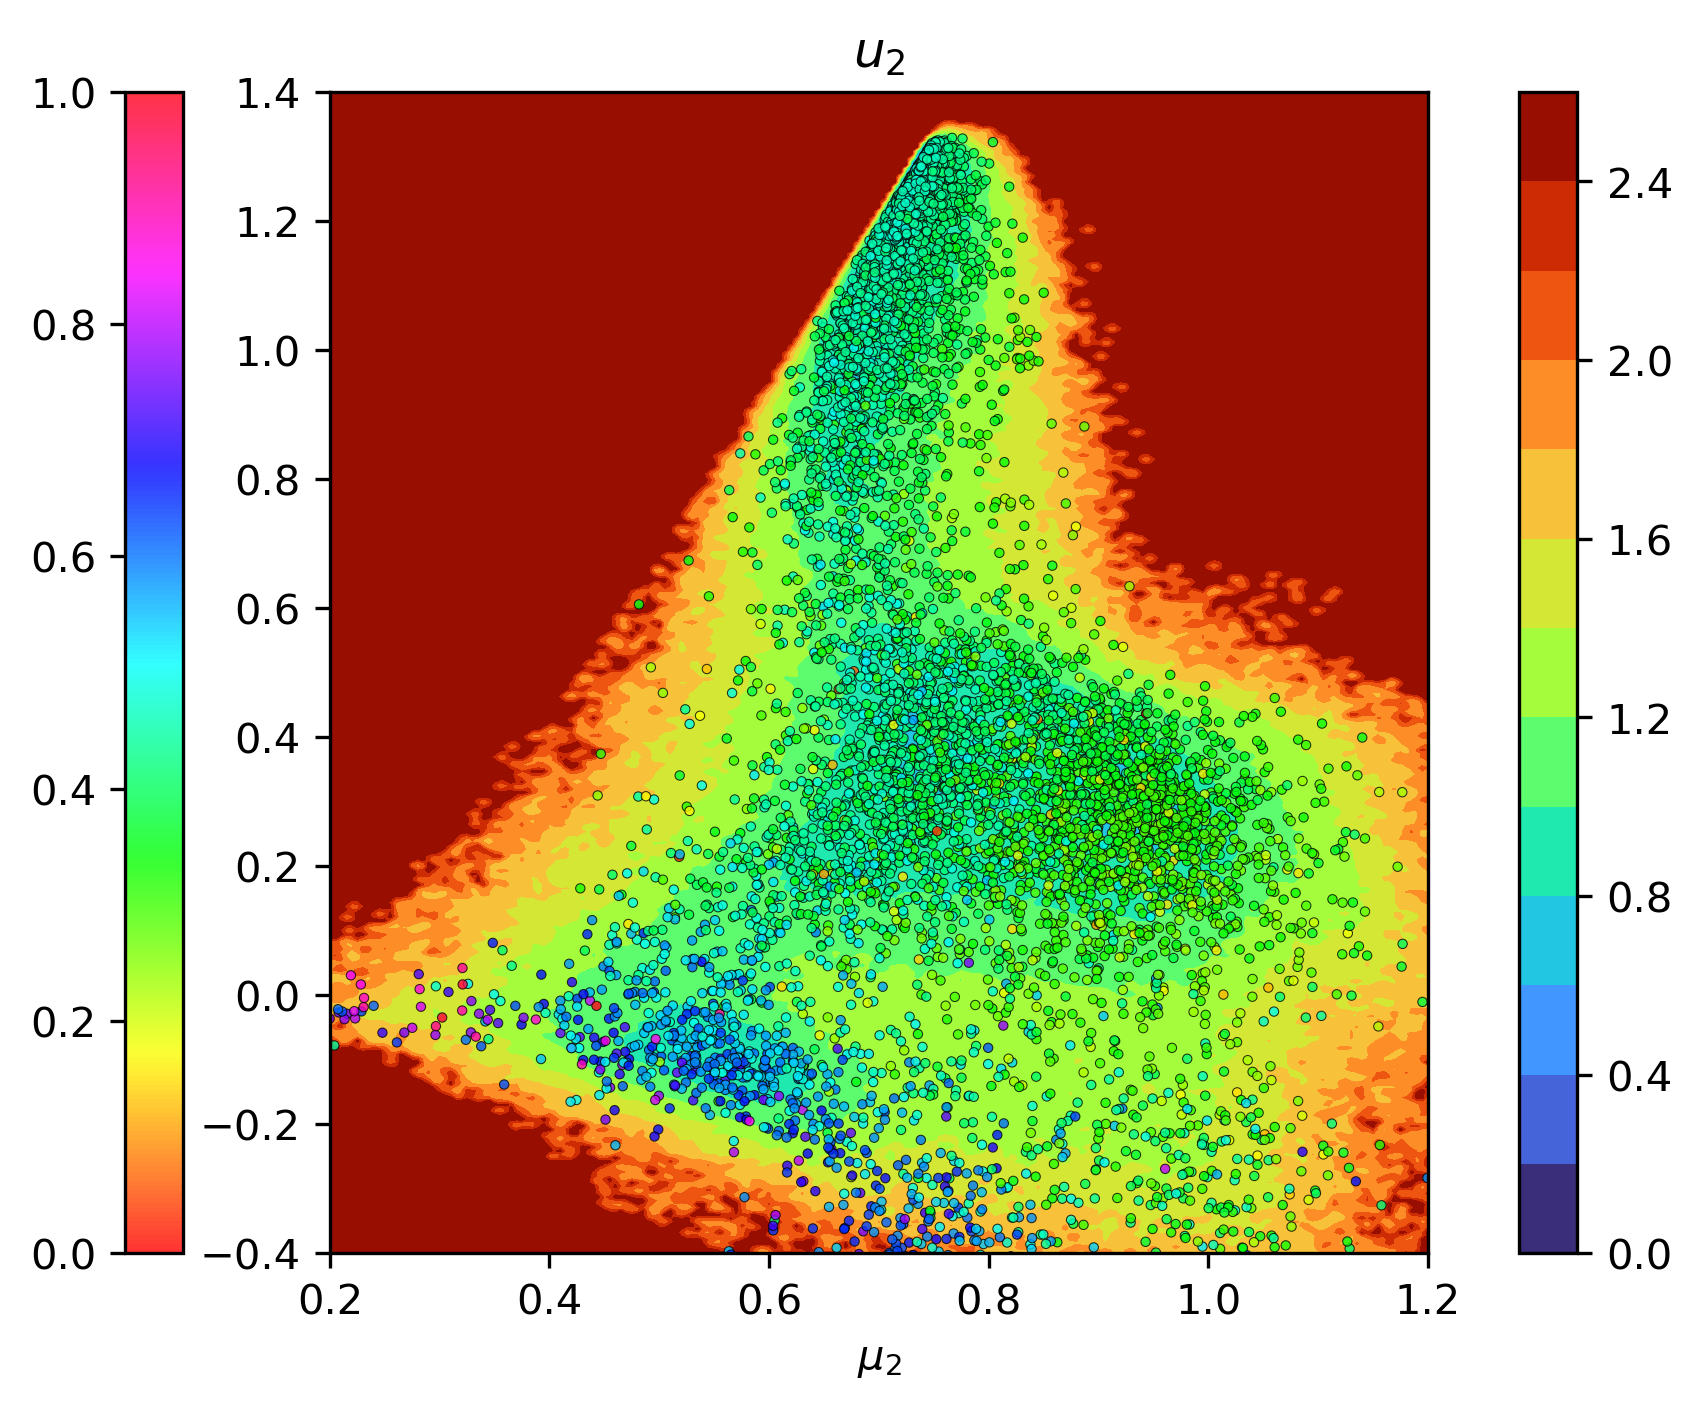

In [133]:
plt.figure(dpi=300)
plt.contourf(xx, yy, energy, cmap='turbo', levels=15)
plt.colorbar()
plt.scatter(trjcv[:, 0], trjcv[:, 1], s=5, c=U[:, 1], alpha=0.8, cmap='hsv', edgecolors='black', linewidth=0.25)
plt.colorbar(location='left')
plt.xlabel('$\mu_2$')
plt.ylabel('$\mu_3$')
plt.ylim(-0.4, 1.4)
plt.xlim(0.2, 1.2)
plt.title('$u_2$')
plt.tight_layout()
plt.show()